

The following information is provided for each record in the dataset:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration
*   Triaxial Angular velocity from the gyroscope
*   A 561-feature vector with time and frequency domain variables
*   The activity label

More information about the features are available on the website linked above.


In [30]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [31]:
import seaborn as sns, pandas as pd, numpy as np

1

Import the data and do the following:

*   Examine the data types--there are many columns, so it might be wise to use value counts.
*   Determine if the floating point values need to be scaled.
*   Determine the breakdown of each activity.
*   Encode the activity label as an integer.


In [32]:
### BEGIN SOLUTION
data = pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

The data columns are all floats except for the activity label.


In [33]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [34]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).


In [35]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [36]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities; they are relatively balanced.


In [37]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.\
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.


In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(20)
### END SOLUTION

9630    1
2736    1
9296    0
5109    1
8563    2
2059    2
4546    2
652     4
743     0
7424    0
4940    1
704     2
2364    5
5440    4
8949    0
2310    3
3541    3
3908    3
7580    3
7492    5
Name: Activity, dtype: int64

 2

*   Calculate the correlations between the dependent variables.
*   Create a histogram of the correlation values.
*   Identify those that are most correlated (either positively or negatively).


In [39]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs  all diagonals and below are now Null
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    


In [40]:
coord

(560, 560)

In [41]:

corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231
"angle(Y,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614


In [42]:
pd.DataFrame(tril_index)

,0,1,2,3,4,5,6,7,8,9,...,157631,157632,157633,157634,157635,157636,157637,157638,157639,157640
0,0,1,1,2,2,2,3,3,3,3,...,560,560,560,560,560,560,560,560,560,560
1,0,0,1,0,1,2,0,1,2,3,...,551,552,553,554,555,556,557,558,559,560


In [43]:
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [44]:
(tril_index)

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [45]:
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [46]:
corr_values

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


A histogram of the absolute value correlations.


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

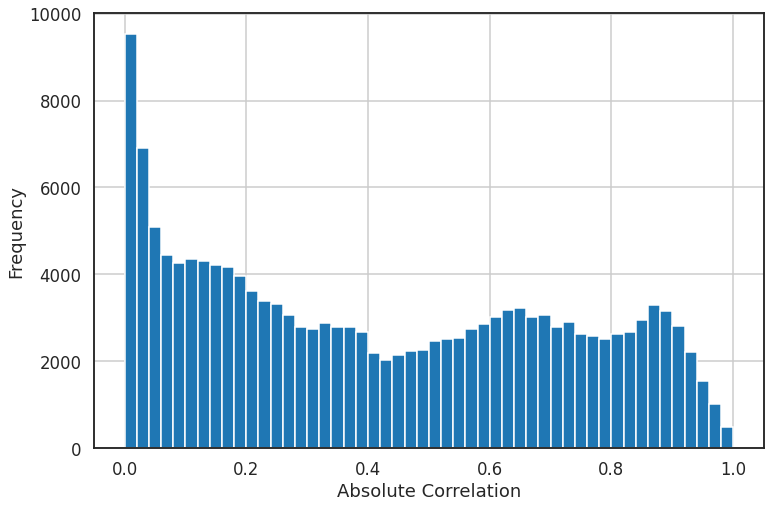

In [48]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [49]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


3

*   Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
*   Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

In [50]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [51]:
X_train.shape

(7209, 561)

In [52]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [53]:
y_test.value_counts(normalize=True)
### END SOLUTION

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

 4

*   Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
*   Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.


In [54]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [56]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [57]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

 5

*   Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.


In [58]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
185 -0.093491  1.887841 -2.135272 -0.304620 -0.465443  0.633427  0.000000   
300  0.168280 -0.322430  0.210832  0.309345 -0.095025  0.201557  0.013995   
440 -0.018536  0.027554  0.104700  0.087017 -0.219281  0.133143  0.000000   
211 -0.005534  0.135921 -0.137265 -0.401044  0.179262  0.159214  0.000000   
282 -0.036071  0.031882 -0.175761 -0.136021 -0.165785 -0.088916  0.000000   
348 -0.064602 -0.190042 -0.395608  0.462108 -0.247096 -0.266495  0.000000   
395 -0.030576  0.068774 -0.056179 -0.403864  0.493984  0.034115  0.000000   
258 -0.005782  0.196109  0.160292  0.010545 -0.010104  0.163269  0.000000   
72  -0.133143  0.117545 -0.066146 -0.641078 -0.443078  1.035463  0.000000   
537  0.041935  0.217774 -0.302268  1.183666 -0.417392 -0.142686  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
185  0.000000  0.000000  0.000000 -1.065107  6.443422 -0.145525  1.139874   
300 -0.666752  0.000000  0.466013  0.000000  0.079819  0.414784 -1.785288   
440  0.000000  0.000000  0.000000  0.000000  0.274589 -0.044313 -0.151570   
211  0.000000  0.000000  0.000000  0.000000  1.368924 -0.024189  0.429085   
282  0.000000  0.000000  0.000000  0.000000 -0.543611 -0.059133  0.436102   
348  0.000000 -0.107012  0.000000  0.000000 -1.620505 -0.110563 -0.730799   
395  0.000000  0.000000 -0.153137  0.021971  0.615191 -0.066040 -0.095663   
258  0.000000  0.000000  0.000000  0.000000  0.145911 -0.030900  0.521916   
72   0.000000  0.000000 -0.223931 -0.933951  2.098102 -0.298117 -1.395148   
537  0.483564 -0.228640  1.360560 -0.045093  0.379723  0.074877  0.649844   

                                             
            2         3         4         5  
185 -2.622216 -0.741077 -0.914192  1.854268  
300  0.371155  0.847957  0.009959  0.192066  
440  0.129136  0.149095 -0.482996  0.433870  
211 -0.174604 -1.303414  0.381929  0.593392  
282 -0.222258 -0.177766 -0.182022 -0.214053  
348 -0.558658  0.886854 -0.376747 -0.471453  
395 -0.072646 -1.040769  1.006539  0.344523  
258  0.173021  0.005134 -0.098321  0.421575  
72   0.043873 -1.552572 -1.066604  1.893854  
537 -0.648289  2.556138 -0.918002 -0.142771

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

In [59]:
pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
   

MultiIndex([('l2', 0),
            ('l2', 1),
            ('l2', 2),
            ('l2', 3),
            ('l2', 4),
            ('l2', 5)],
           )

In [60]:
mod.coef_.shape

(6, 561)

In [61]:
coefficients.xs

<bound method NDFrame.xs of            lr                                                          l1  \
            0         1         2         3         4         5         0   
0   -0.087506 -0.445226  0.257963 -0.169283  0.764733 -0.080084  0.000000   
1    0.014493 -0.201047  0.060892 -0.023509  0.107888 -0.247193  0.000000   
2    0.030187  0.063196  0.245909  0.022339  0.059576 -0.402526  0.000000   
3    0.004590 -0.733963 -0.352732 -0.701327  0.267160  0.696120  0.000000   
4   -0.045407 -0.034155 -0.451850  0.260239 -0.516451  0.106248  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
556 -0.022132 -0.659468  0.550630 -0.234916  0.384852 -0.351492  0.000000   
557  0.058454 -0.246969  0.268995 -0.162010 -0.159057  0.174153  0.000000   
558  1.599105 -2.473095 -0.854612 -0.313143 -0.712011  0.416311  5.395563   
559 -0.374313 -0.740397  1.771455 -0.242904 -0.274205  0.876728  0.000000   
560 -0.188309 -0.298022  0.416920  0.065047 -0.0

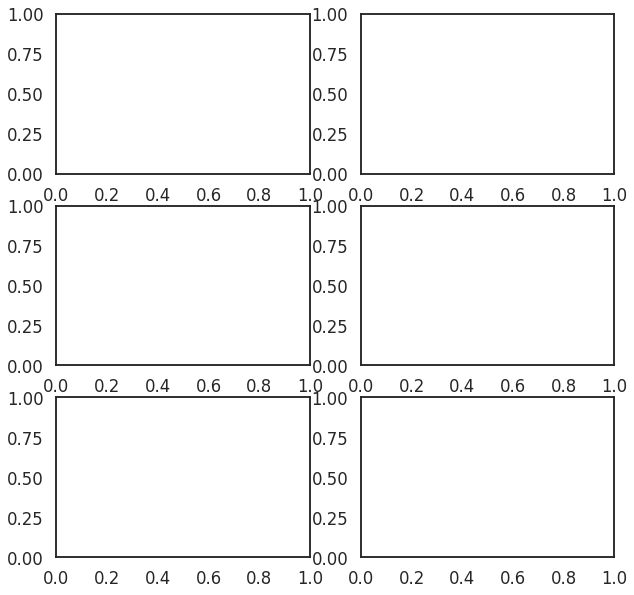

In [62]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):

    print(axList)

Prepare six separate plots for each of the multi-class coefficients.


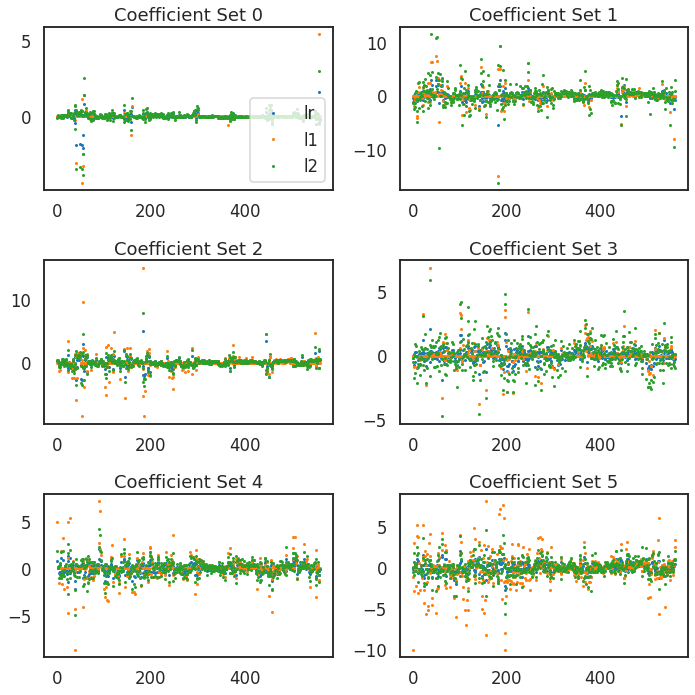

In [63]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

 6

*   Predict and store the class for each model.
*   Store the probability for the predicted class for each model.


In [64]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))   #0,1,2,3,...
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))   
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head(12)

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0
5,5,5,5
6,0,0,0
7,2,2,2
8,0,0,0
9,0,0,0


In [ ]:
y_pred.shape

(3090, 3)

In [ ]:
y_prob.head()
### END SOLUTION

,lr,l1,l2
0,0.998939,0.998957,0.999758
1,0.988165,0.999545,0.999477
2,0.987592,0.995702,0.999685
3,0.981381,0.999191,0.994337
4,0.998277,0.999925,0.999997


7

For each model, calculate the following error metrics:

*   Accuracy
*   Precision
*   Recall
*   F-score
*   Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.


In [ ]:
score(y_test,y_pred['lr'])[0] #0 precision 1 recall 2 f score 3 breakdown

array([1.        , 0.9588015 , 0.96322242, 0.99613153, 0.99526066,
       0.99568035])

In [ ]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [ ]:
metrics
### END SOLUTION

,lr,l1,l2
precision,0.984144,0.983835,0.983824
recall,0.984142,0.983819,0.983819
fscore,0.984143,0.983815,0.983819
accuracy,0.984142,0.983819,0.983819
auc,0.990384,0.990144,0.990165


8

*   Display or plot the confusion matrix for each model.


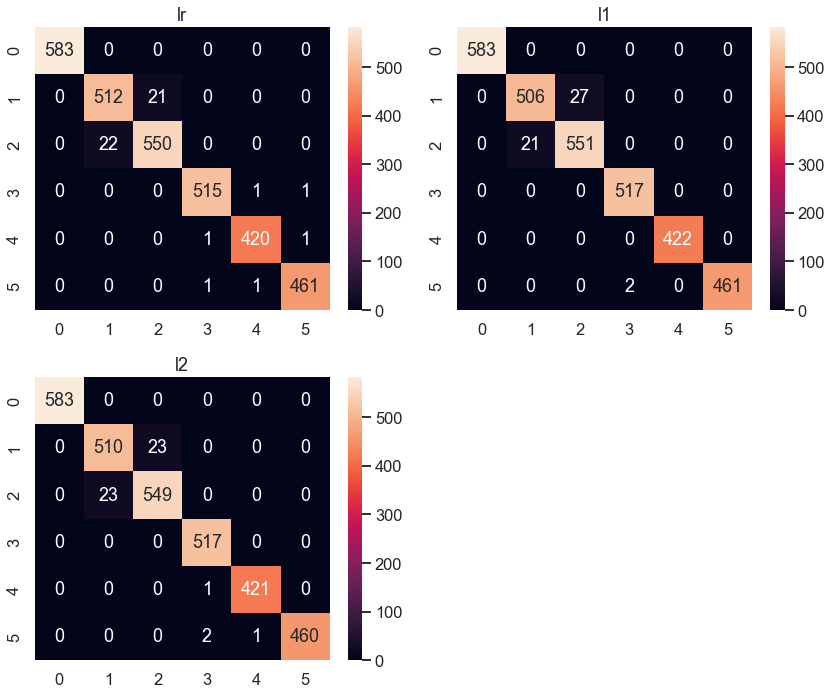

In [ ]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION

***

### Machine Learning Foundation (C) 2020 IBM Corporation
